In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
from PIL import Image


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


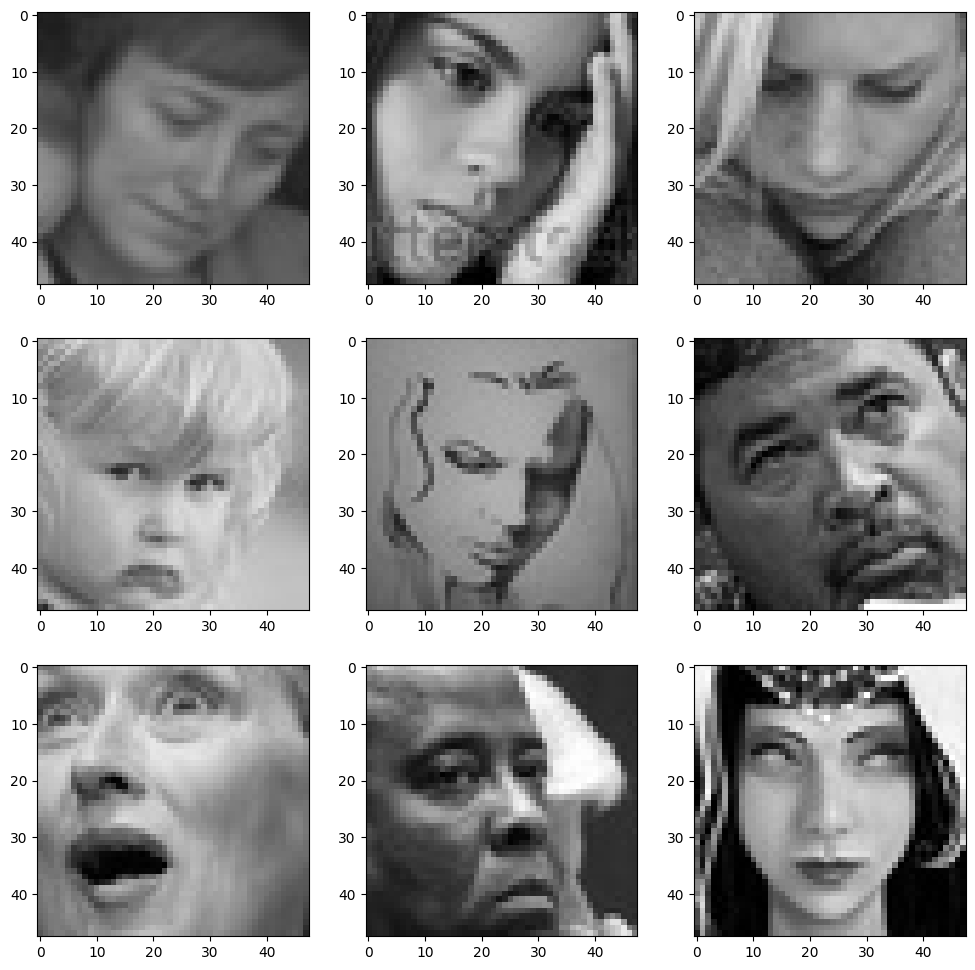

In [4]:
#show images
picture_size = 48
folder_path = "./images/"
expression = 'depression'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
 plt.subplot(3,3,i)
 img = load_img(folder_path+"train/"+expression+"/"+
 os.listdir(folder_path + "train/" +expression)[i], target_size=(picture_size, picture_size))
 plt.imshow(img) 
plt.show()


In [5]:
#Making Training and Validation Data
batch_size = 128
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()
train_set=datagen_train.flow_from_directory(folder_path+"train",target_size = (picture_size,picture_size),color_mode = "grayscale", batch_size=batch_size, class_mode='categorical',shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",target_size = (picture_size,picture_size),color_mode = "grayscale",batch_size=batch_size, class_mode='categorical',shuffle=False)

Found 9920 images belonging to 2 classes.
Found 2355 images belonging to 2 classes.


In [6]:
train_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
labels=train_set.class_indices

In [8]:
train_set.image_shape

(48, 48, 1)

In [9]:
train_set.num_classes

2

In [10]:
#Model Building
no_of_classes = 2
model = Sequential()
#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape =(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
29
#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(no_of_classes, activation='softmax'))
opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', 
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [11]:
#Fitting the Model with Training and Validation Data
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)
callbacks_list =[early_stopping,checkpoint,reduce_learningrate]
epochs = 45
model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
history = model.fit(generator=train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps =test_set.n//test_set.batch_size,callbacks=callbacks_list)


C:\Users\divve\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/45
77/77 [==============================] - 89s 1s/step - loss: 0.7851 - accuracy: 0.5569 - val_loss: 3.2404 - val_accuracy: 0.4961
Epoch 2/45
77/77 [==============================] - 5s 61ms/step - loss: 0.6978 - accuracy: 0.5957 - val_loss: 0.7165 - val_accuracy: 0.5977
Epoch 3/45
77/77 [==============================] - 5s 62ms/step - loss: 0.6634 - accuracy: 0.6288 - val_loss: 0.6958 - val_accuracy: 0.5885
Epoch 4/45
77/77 [==============================] - 5s 64ms/step - loss: 0.6376 - accuracy: 0.6496 - val_loss: 0.6433 - val_accuracy: 0.6445
Epoch 5/45
77/77 [==============================] - 5s 65ms/step - loss: 0.6044 - accuracy: 0.6741 - val_loss: 0.6162 - val_accuracy: 0.6584
Epoch 6/45
77/77 [==============================] - 5s 66ms/step - loss: 0.5832 - accuracy: 0.6936 - val_loss: 0.7205 - val_accuracy: 0.6298
Epoch 7/45
77/77 [==============================] - 5s 65ms/step - loss: 0.5692 - accuracy: 0.7040 - val_loss: 0.5976 - val_accuracy: 0.6766
Epoch 8/45
77/

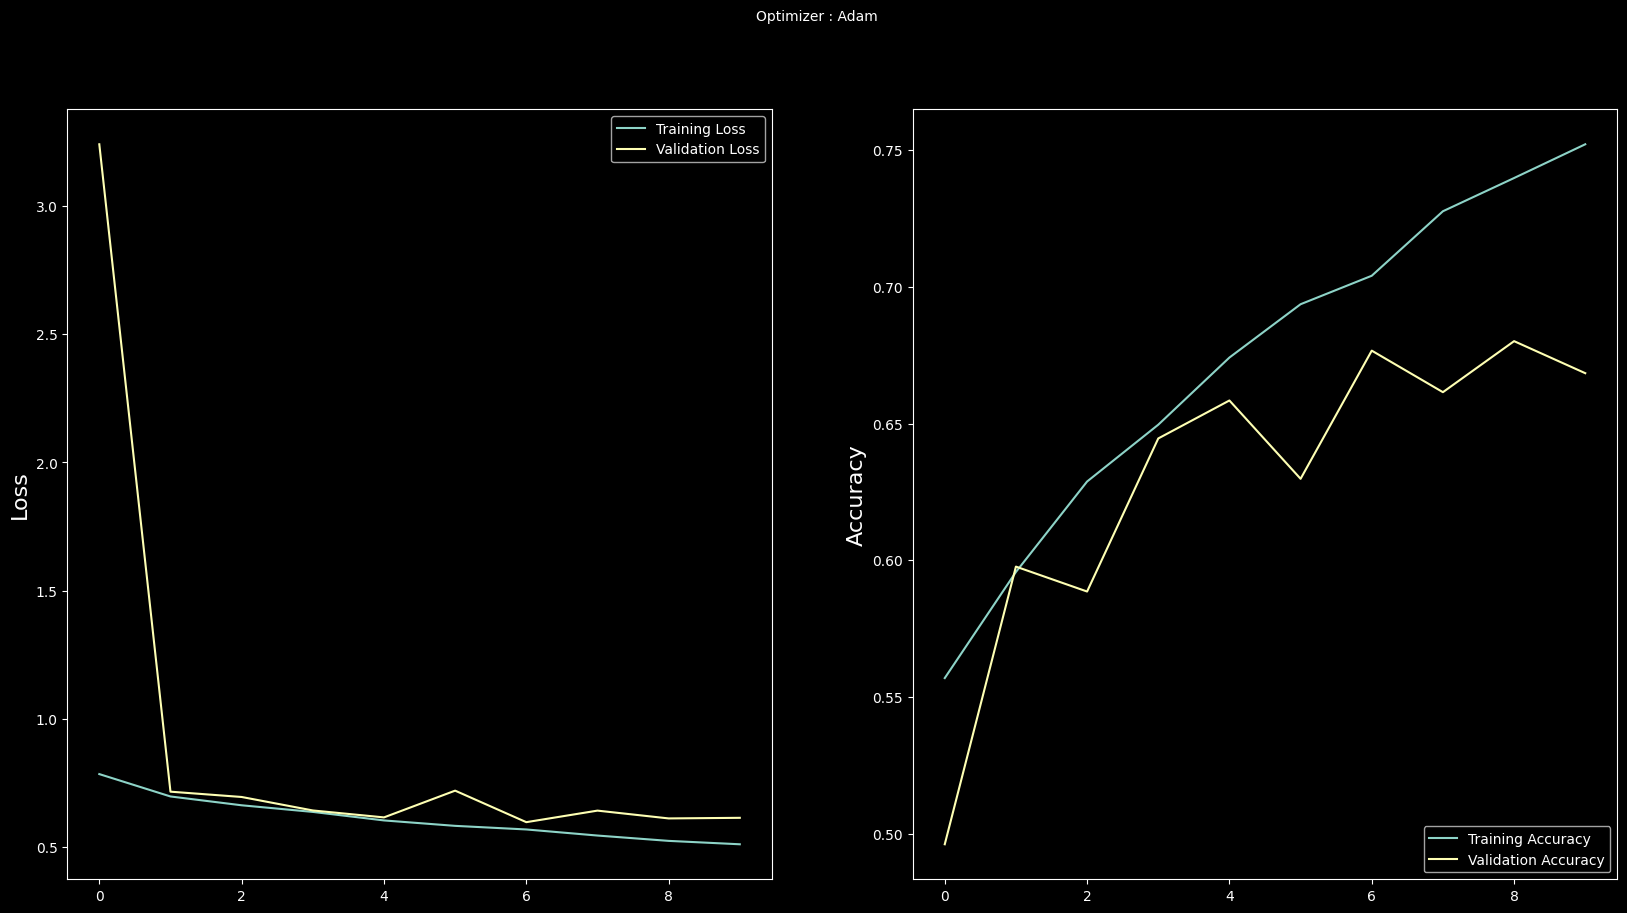

In [17]:
#Plotting Accuracy & Loss
# plt.style.use('white_background')
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [18]:
labels=train_set.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

{0: 'depression', 1: 'neutral'}


In [20]:

img = Image.open(r'./images/test/depression/350.jpg')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

90.12301564216614% Confidence depression


In [21]:



img = Image.open(r'./depression.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

84.12672281265259% Confidence depression


In [22]:

img = Image.open(r'./images/test/depression/822.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

56.15536570549011% Confidence depression


In [23]:
model.save("my_model.h5")

In [24]:
from tensorflow import keras

In [25]:
model1 = keras.models.load_model("my_model.h5")

In [27]:

img = Image.open(r'./images/test/depression/1022.jpg')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model1.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

77.97440886497498% Confidence depression


In [29]:

img = Image.open(r'./depression.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model1.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

84.12672281265259% Confidence depression
